In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Load the Data

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
#Load the Fashion-MNIST dataset
fashion_mnist_data= tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) =fashion_mnist_data.load_data()


4423680/4422102 [==============================] - 4s 1us/step


In [3]:
#Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [16]:
#Difine the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# Rescale the images to take values between 0 and 1


In [17]:
#Rescale the image values so that they lie in between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

# Display the first image

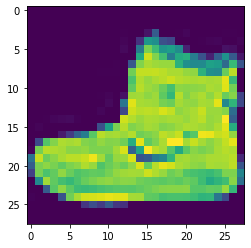

label: Ankle boot


In [22]:
#Display one of the images
import matplotlib.pyplot as plt
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[0]]}')


# Build the MOdel
# The model will be a 2D Convolutional kernel (3 X 3) of 16 channels and relu activation. 
# Then we will continue with a Max Pooling (3 x 3) and finally will
# be a fully connected layer of 10 neurons (as many as the labels) and a softmax activation function.

In [25]:
model = Sequential([
    Conv2D(16, (3,3),activation = 'relu' , input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
           ])
#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

We will compile the model using the adam optimizer and a sparse_categorical_crossentropy loss function. Finally, 
our metric will be the accuracy.

NB: We use the sparse_categorical_crossentropy because our y labels are in 1D array taking values from 0 to 9. 
If our y was labeled with one hot encoding then we would have used the categorical_crossentropy.

In [26]:
model.compile(optimizer='adam',#sgd etc
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Fit the Model

Before we fit the model, we need to change the dimensions of the train images using the np.newaxis. 
Notice that from (60000, 28, 28) it will become (60000, 28, 28, 1)

In [35]:
train_images[...,np.newaxis].shape

(60000, 28, 28, 1)

In [37]:
history = model.fit(train_images[...,np.newaxis], train_labels,epochs=50,batch_size = 256)

Epoch 1/50
235/235 [==============================] - 10s 40ms/step - loss: 0.7399 - accuracy: 0.7408
Epoch 2/50
235/235 [==============================] - 11s 49ms/step - loss: 0.7170 - accuracy: 0.7476
Epoch 3/50
235/235 [==============================] - 10s 43ms/step - loss: 0.6986 - accuracy: 0.7526
Epoch 4/50
235/235 [==============================] - 9s 39ms/step - loss: 0.6813 - accuracy: 0.7585
Epoch 5/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6672 - accuracy: 0.7621
Epoch 6/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6536 - accuracy: 0.7670
Epoch 7/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6418 - accuracy: 0.7719
Epoch 8/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6305 - accuracy: 0.7747
Epoch 9/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6207 - accuracy: 0.7785
Epoch 10/50
235/235 [==============================] - 9s 38ms/step - loss: 0.6115 - acc

In [39]:
#Load the history into a pandas Datafram
df =pd.DataFrame(history.history)
df.tail()

,loss,accuracy
45,0.468191,0.834983
46,0.466469,0.835567
47,0.464058,0.837200
48,0.462381,0.837533
49,0.460745,0.837717


# Evaluate the Model

In [40]:
# We will evaluate our model on the test dataset.
#Evaluete the model
model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.4907 - accuracy: 0.8245


[0.4907326102256775, 0.8245000243186951]

# Make Predictions

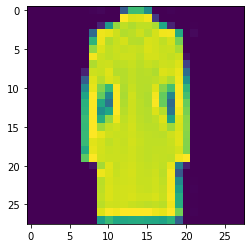

In [46]:
#Choos a random test image
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()

In [50]:
#get the model predictions
predictions = model.predict(test_image[np.newaxis, ...,np.newaxis])
print(f'Model Prediction: {labels[np.argmax(predictions)]}')

Model Prediction: Coat


In [51]:
predictions

array([[1.1389960e-02, 1.6111450e-03, 1.1323675e-03, 1.8246178e-01,
        7.5353253e-01, 6.8490852e-11, 4.9450211e-02, 4.9275548e-09,
        4.2209218e-04, 2.9136260e-10]], dtype=float32)

In [52]:
np.argmax(predictions)

4